# Admixture Analysis

In this half of the tutorial,we will cover how to estimate admixture proportions using [ADMIXTURE](https://dalexander.github.io/admixture/admixture-manual.pdf). In the previosu example, our PCA results revealed that the individuals in the simulated cohort map closely to the European reference population, with no admixture between ancestries. In this next example, we will use admixture mapping to understand the population structure of individuals from admixed backgrounds.

Admixture proportion inference involves modeling individuals in a sample based on the portion of their genetic makeup originating from various source populations. The objective is to deduce the ancestry proportions from each source population, enabling the creation of concise visual summaries that highlight the presence of population structure within the sample.

The data for this will be SNPs from patients in from the Bronx with pediatric obese asthma desribed here:

[Functional Genomics of the Pediatric Obese Asthma Phenotype Reveal Enrichment of Rho-GTPase Pathways (Rastogi et al., 2020)](https://pubmed.ncbi.nlm.nih.gov/32255672/)

For the reference panel to be used in this analysis, we will use 3 different SNP datasets:
1) [1000 Genomes Project](https://www.nature.com/articles/nature15393)
2) [Human Genome Diversity Project](https://www.nature.com/articles/nrg1596)
3) [Simons Genome Diversity Project](https://www.nature.com/articles/nature18964)

* We will start use a merged dataset of our patient SNPs and the reference panels that have been QC'ed and analyzed for principal components by PLINK.

### PCA of Admixed Data
We plotted the first 2 principal components of our 85 admixed samples labeled as "Asthma Panel" and the reference individuals. As you can see, compared to the first example, there is a clear pattern of admixed ancestries for these patients indicated by the spread primarliy along PC1. To investigate the ancestry of these patients further, we will use ADMIXTURE.

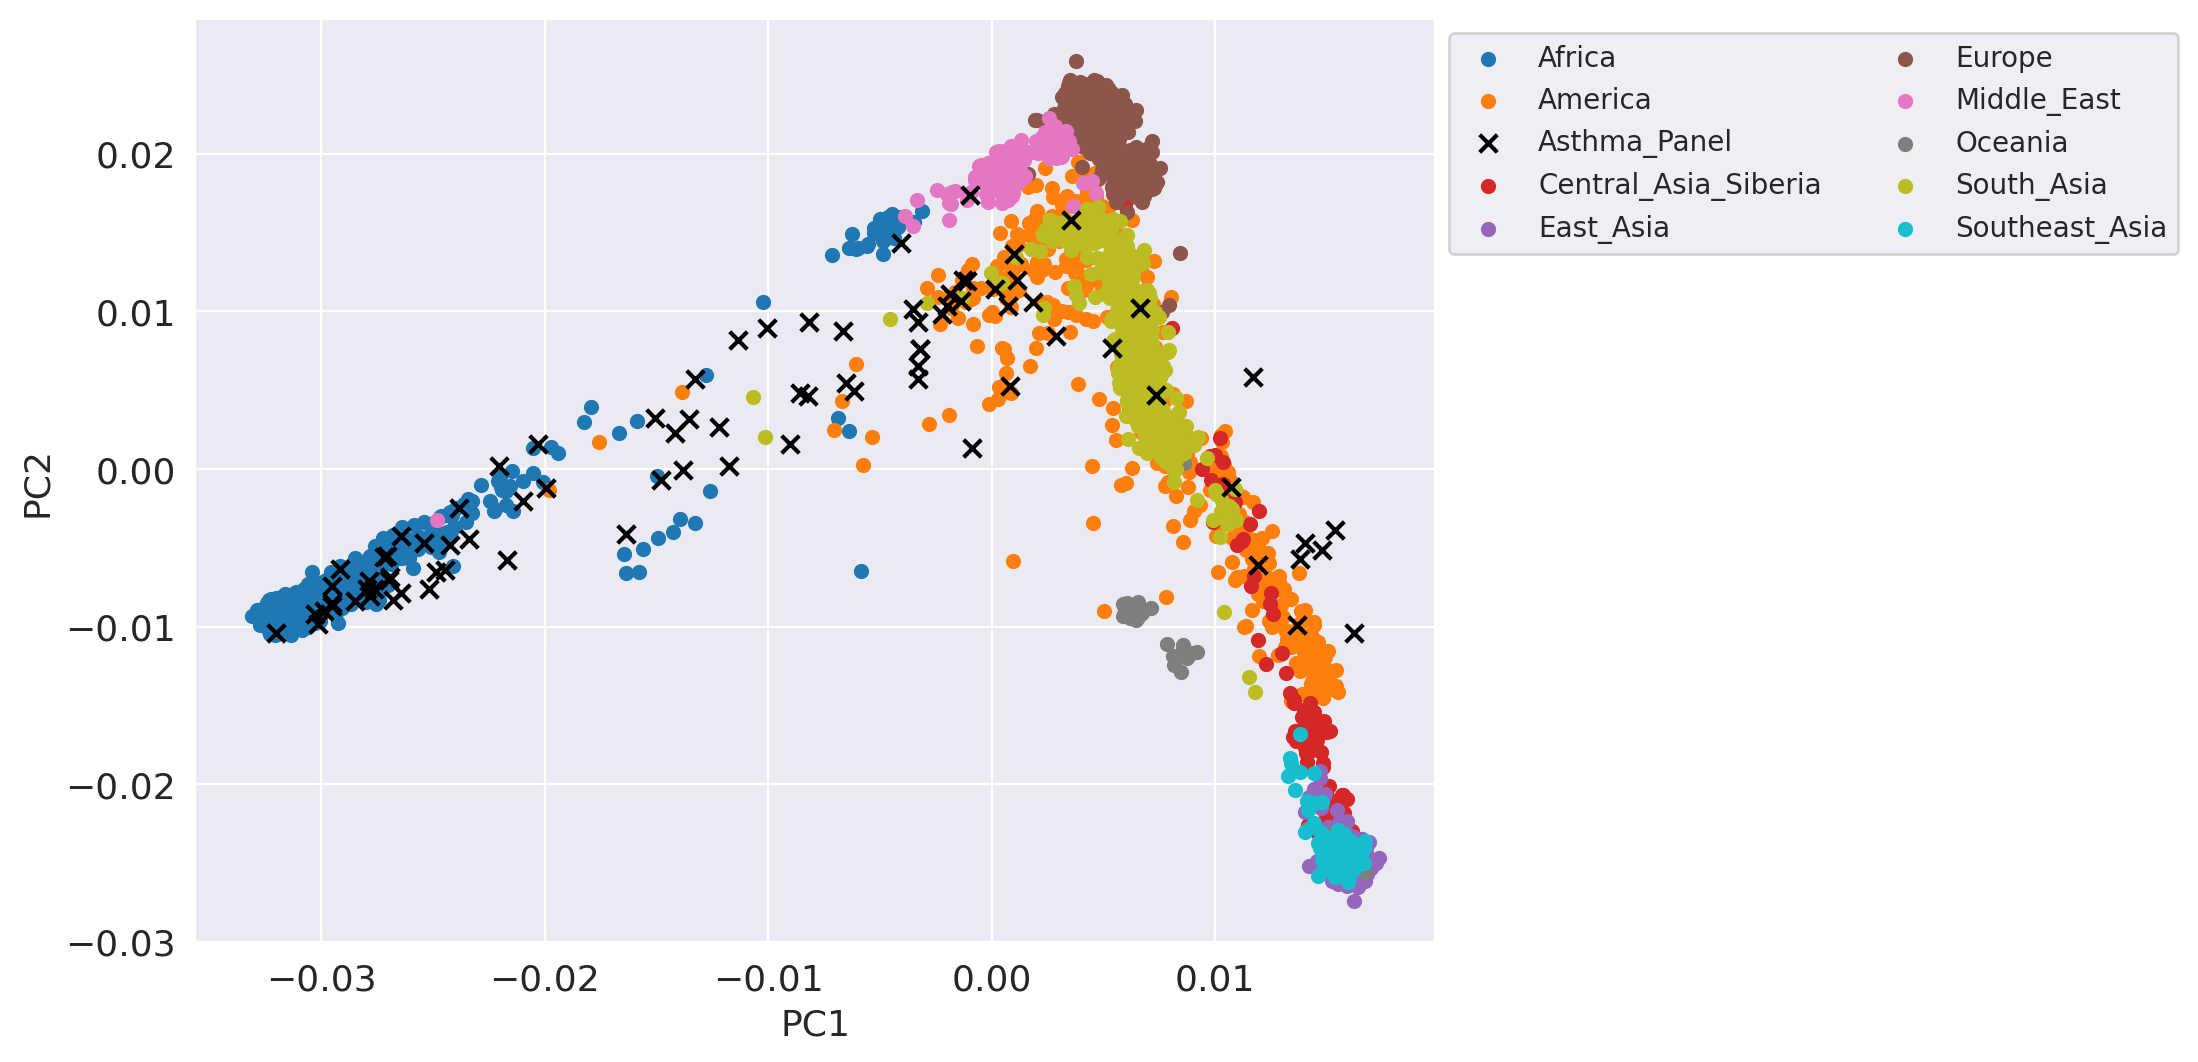

### Running ADMIXTURE

The basic syntax of admixture is as follows: admixture $INPUT.bed $K. 

Here $K is a number indicating the number of clusters you want to infer. Determining the appropriate number of clusters involves running the analysis with various cluster numbers, such as K values ranging from 2 to 20 initially. The admixture tool includes an intrinsic method to assess "cross-validation error" for each K. To compute this error, one simply needs to include the --cv flag in the admixture command. Although this process can be time-consuming, it is highly recommended to utilize the cross-validation feature for a more thorough analysis.

However, since this tool runs for relatively long, we will omit this feature here and display the results below:







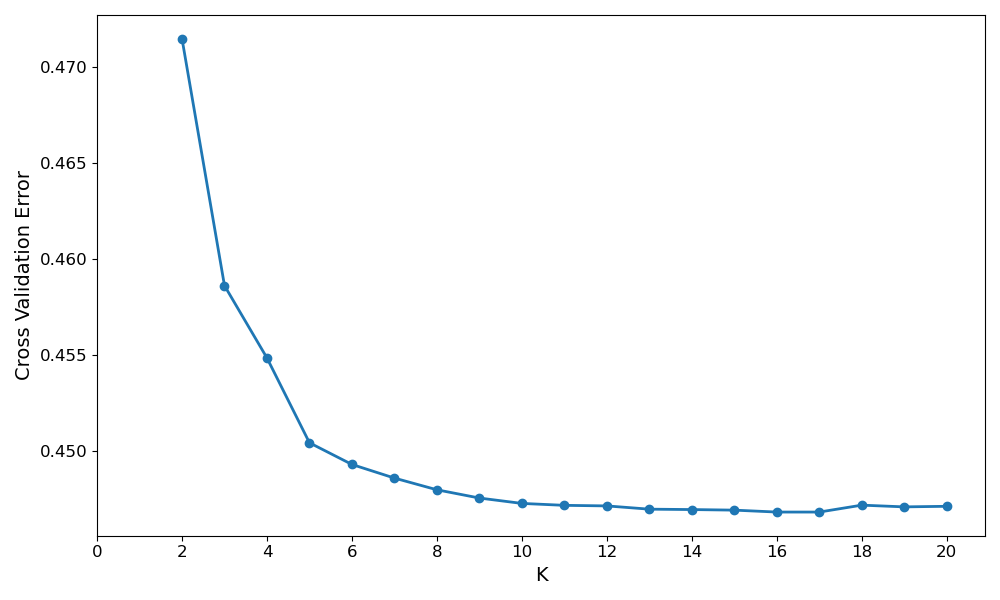

Ideally, we select a value for $K based on the lowest cross validation error  which in this example is between K=12 and K=15.

However, we will use K=5 as it corresponds with the superpopulations defined in 1000 Genomes Project (AFR,EUR,AMR,EAS and SAS).

Choice of K depends on the purpose. If we want to know detailed population structure, we should use the lowest CV. In this case, we simply would like to resolve ancestry proportions at the superpopulation level.

### ADMIXTURE Results

ADMIXTURE produces two types of output files. The file with suffix .P contains a table of the allele frequencies inferred for each SNP in each population. The file with suffix .Q contains a table of inferred individual ancestry proportions from the K ancestral populations, with one row per individual. We will now view these results using [Pong](https://github.com/ramachandran-lab/pong/blob/master/pong-manual.pdf), which visualizes individual ancestry with similarity between individuals within clusters.

The command below will plot results using Pong. However, there are issues tring to execute this on the HPC and therefore must be ran locally.

!pong -m pong_filemap -i labels_ind2pop.txt


The Pong results for K=5 are shown below:

# ADMIXTURE results for K=1 to K=5

Each slender vertical line represents an individual, and each distinct color signifies an inferred ancestral population. The extent of each color within a vertical bar indicates the percentage of that individual's heritage originating from the inferred ancestral population associated with that specific color.

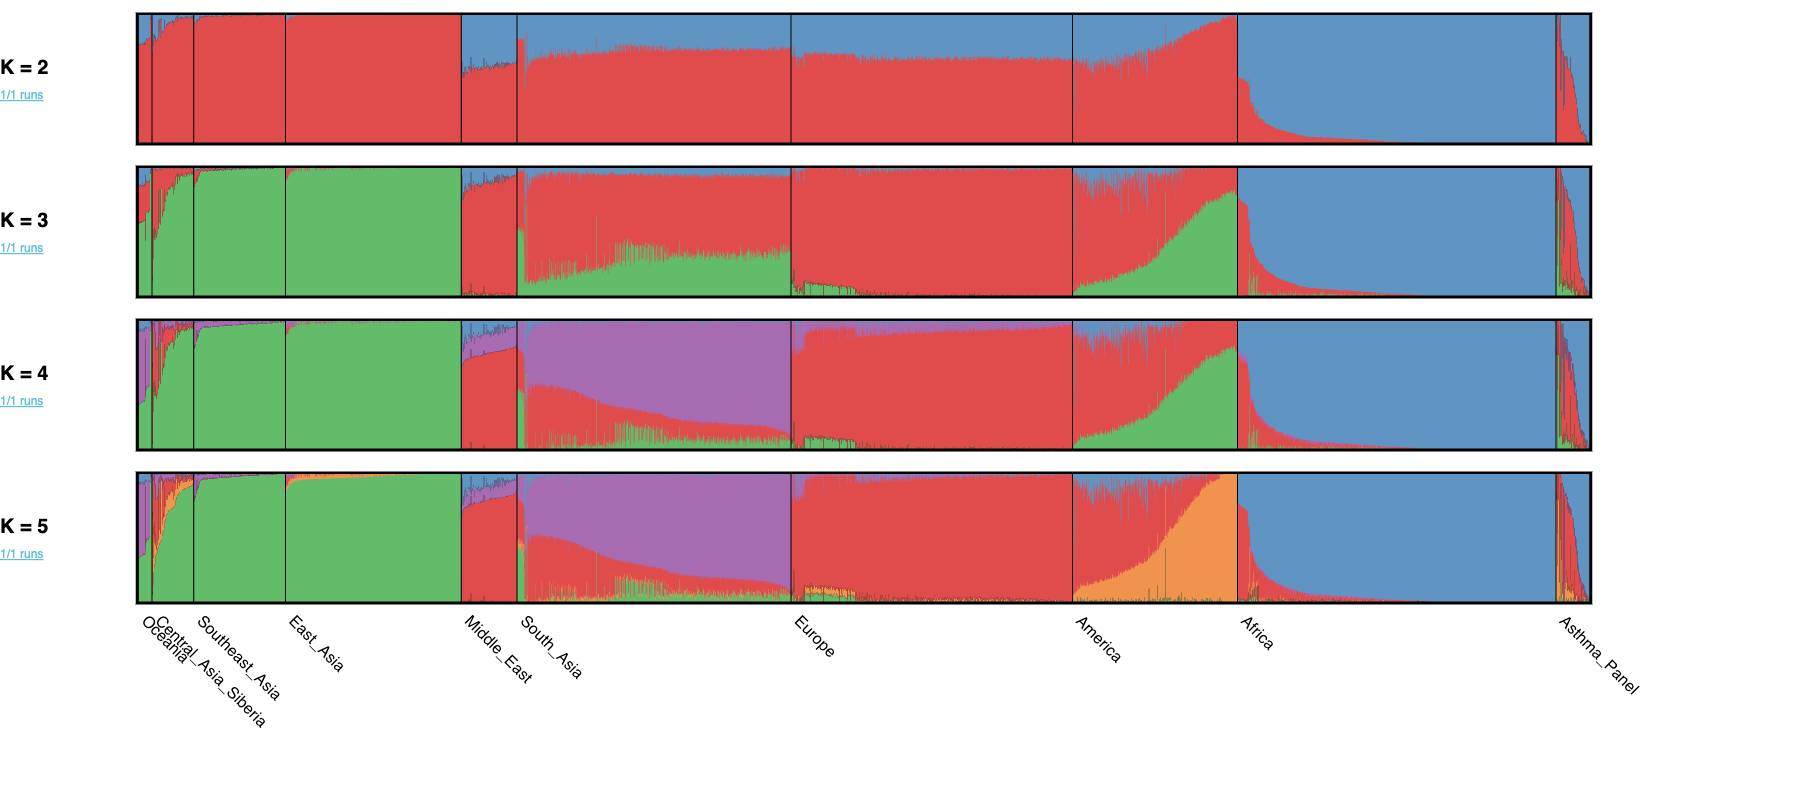


## Zoomed in on Asthma Panel

ADMIXTURE results show diverse genetic backgrounds within our asthma study cohort arising from 2- to 4-way admixture. As anticipated (the patients from the Bronx are of self-reported Hispanic and African American ancestry), most cohort members share ancestral components seen in African, European, and American genetic backgrounds. 2 individuals displayed 2-way admixture between Africa (blue) and South Asia (purple), while 1 individual comprised most of their genetic ancestry from an ancestral component seen in East Asian populations (green) and potential admixture with African or American ancestries. 

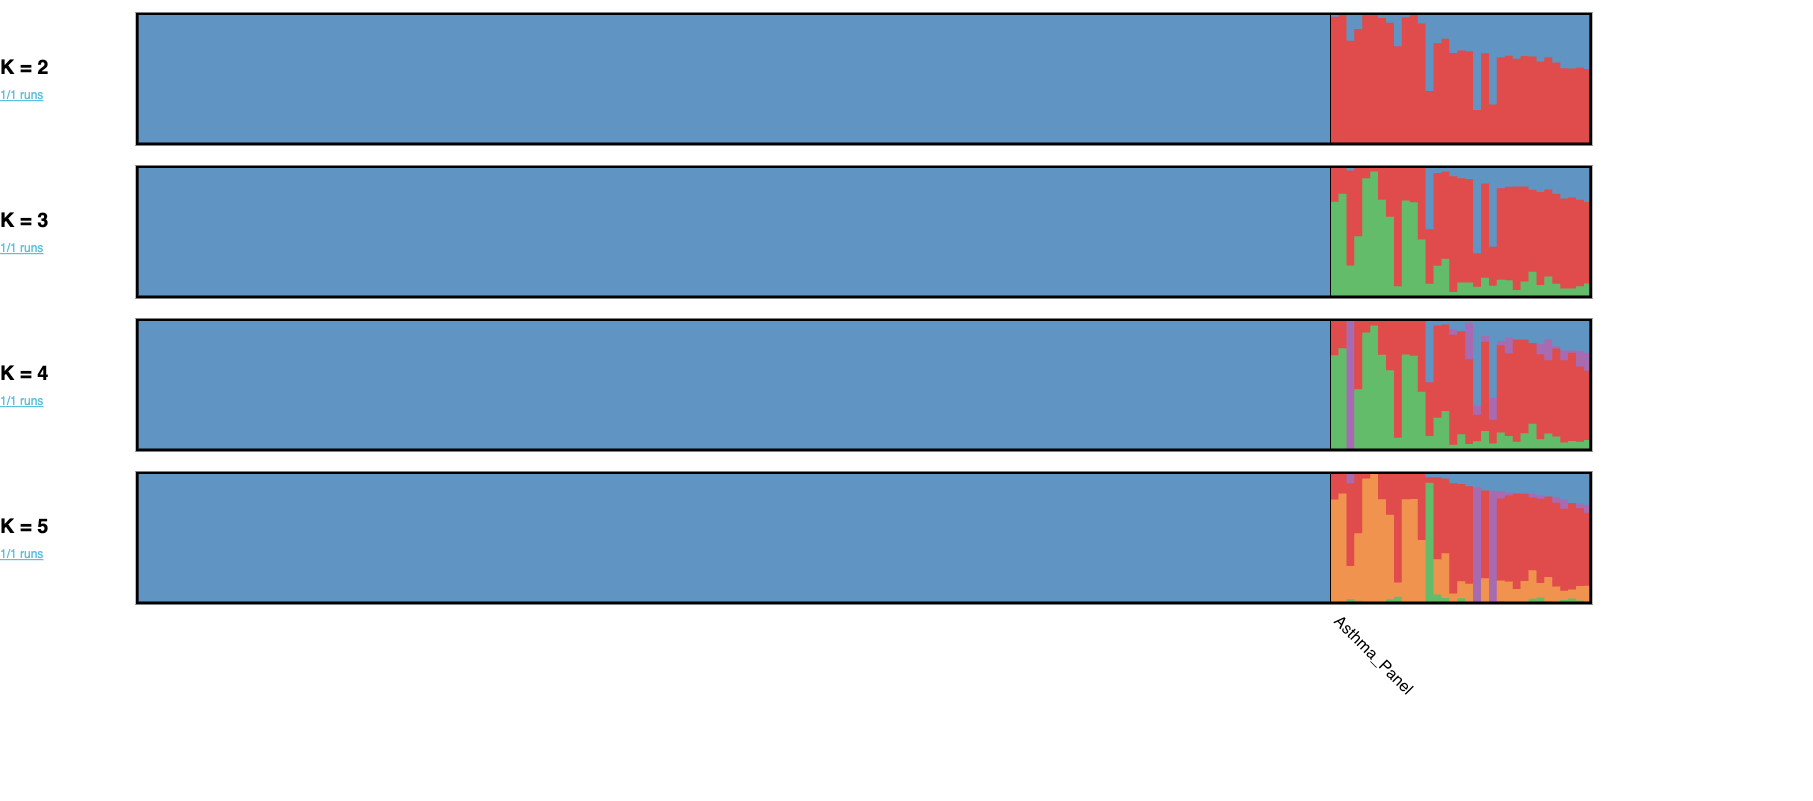